In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'/Users/maxwell/Documents/CMU/Courses/Mini 5/ML Capstone/ML-Capstone/Code'

In [105]:
data = pd.read_csv('../data/train_weekly.csv')
test_data = pd.read_csv('../data/test_weekly.csv')
data.Time = pd.to_datetime(data.Time)
test_data.Time = pd.to_datetime(test_data.Time)
# data = data.iloc[::-1].reset_index(drop = True)
# test_data = test_data.iloc[::-1].reset_index(drop = True)

In [106]:
data.drop(['Unnamed: 0'], axis = 1, inplace=True)
test_data.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [107]:
data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Signal', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L',
       'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV',
       'JNK_Volume', 'Flag'],
      dtype='object')

In [108]:
test_data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Signal', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L',
       'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV',
       'JNK_Volume', 'Flag'],
      dtype='object')

<AxesSubplot:>

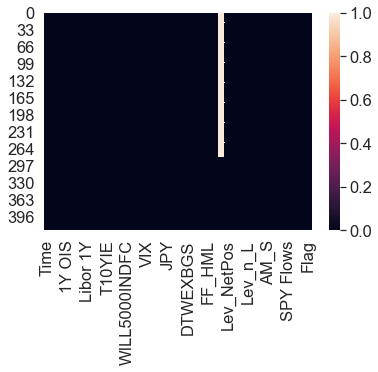

In [109]:
sns.heatmap(data.isnull())

__Lag the CoT Data__

In [110]:
def lag_data(data, lag_variable_lst, rewrite_lst):
    if lag_variable_lst:
        data[['lag_'+v for v in lag_variable_lst]] = data[lag_variable_lst].shift(1)
    if rewrite_lst:
        data[rewrite_lst] = data[rewrite_lst].shift(1)
    return data

In [111]:
def diff_data(data, variable_lst):
    data[['diff_'+v for v in variable_lst]] = data[variable_lst].shift(1)
    return data

In [112]:
lag = ['Libor 3 mo', 'Libor 6 mo', 'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'JPY', 'EUR']
rw = ['AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S', 'AM_L', 'AM_S',
       'Lev_L', 'Lev_S','Lev_NetPos']
data = diff_data(lag_data(data, ['AM_NetPos'], rw), lag)
test_data = diff_data(lag_data(test_data, ['AM_NetPos'], rw), lag)

In [113]:
data.drop(['Signal', 'Flag'], axis = 1, inplace = True)
test_data.drop(['Signal', 'Flag'], axis = 1, inplace = True)

In [114]:
data = data.dropna().reset_index(drop = True)
test_data = test_data.dropna().reset_index(drop = True)

In [115]:
p = len(data.columns)
p

46

In [116]:
data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S',
       'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume',
       'lag_AM_NetPos', 'diff_Libor 3 mo', 'diff_Libor 6 mo', 'diff_Libor 1Y',
       'diff_T10Y3M', 'diff_T10Y2Y', 'diff_JPY', 'diff_EUR'],
      dtype='object')

## Study Positioning Dynamics

In [117]:
data['dNetPos'] = data['AM_NetPos'].diff()
test_data['dNetPos'] = test_data['AM_NetPos'].diff()
#data['dNetPos_log_rate'] = np.log(data['AM_NetPos']).diff() 
#test_data['dNetPos_log_rate'] = np.log(test_data['AM_NetPos']).diff()

In [118]:
data = data.dropna().reset_index(drop = True)
test_data = test_data.dropna().reset_index(drop = True)

In [119]:
data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S',
       'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume',
       'lag_AM_NetPos', 'diff_Libor 3 mo', 'diff_Libor 6 mo', 'diff_Libor 1Y',
       'diff_T10Y3M', 'diff_T10Y2Y', 'diff_JPY', 'diff_EUR', 'dNetPos'],
      dtype='object')

In [120]:
p = len(data.columns)
p

47

In [127]:
# For training purpose
time_periods = data['Time']
X_train = data.iloc[:,2:p-1]
y_train = data.iloc[:,-1]
#y_train_gr = data.iloc[:,-1]
#y_train_alter = weekly_data.iloc[:,2]
X_test = test_data.iloc[:,2:p-1]
y_test = test_data.iloc[:,-1]
#y_test_gr = test_data.iloc[:,-1]
#y_test_alter = test_weekly_data.iloc[:,2]

In [128]:
X_train.columns

Index(['FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo', 'Libor 1Y', 'T10Y3M',
       'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX', 'WILL5000INDFC', 'NASDAQCOM',
       'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS', 'JPY', 'EUR', 'USDX_Close',
       'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML', 'FF_MOM', 'Lev_NetPos',
       'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L',
       'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume', 'lag_AM_NetPos',
       'diff_Libor 3 mo', 'diff_Libor 6 mo', 'diff_Libor 1Y', 'diff_T10Y3M',
       'diff_T10Y2Y', 'diff_JPY', 'diff_EUR'],
      dtype='object')

In [129]:
y_train.head()

0   -17663.0
1    -1699.0
2    23534.0
3    -4359.0
4     -346.0
Name: dNetPos, dtype: float64

In [130]:
data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S',
       'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume',
       'lag_AM_NetPos', 'diff_Libor 3 mo', 'diff_Libor 6 mo', 'diff_Libor 1Y',
       'diff_T10Y3M', 'diff_T10Y2Y', 'diff_JPY', 'diff_EUR', 'dNetPos'],
      dtype='object')

### Modeling

For starters, we want to try some basic regression-based model: ridge, lasso, GAM.

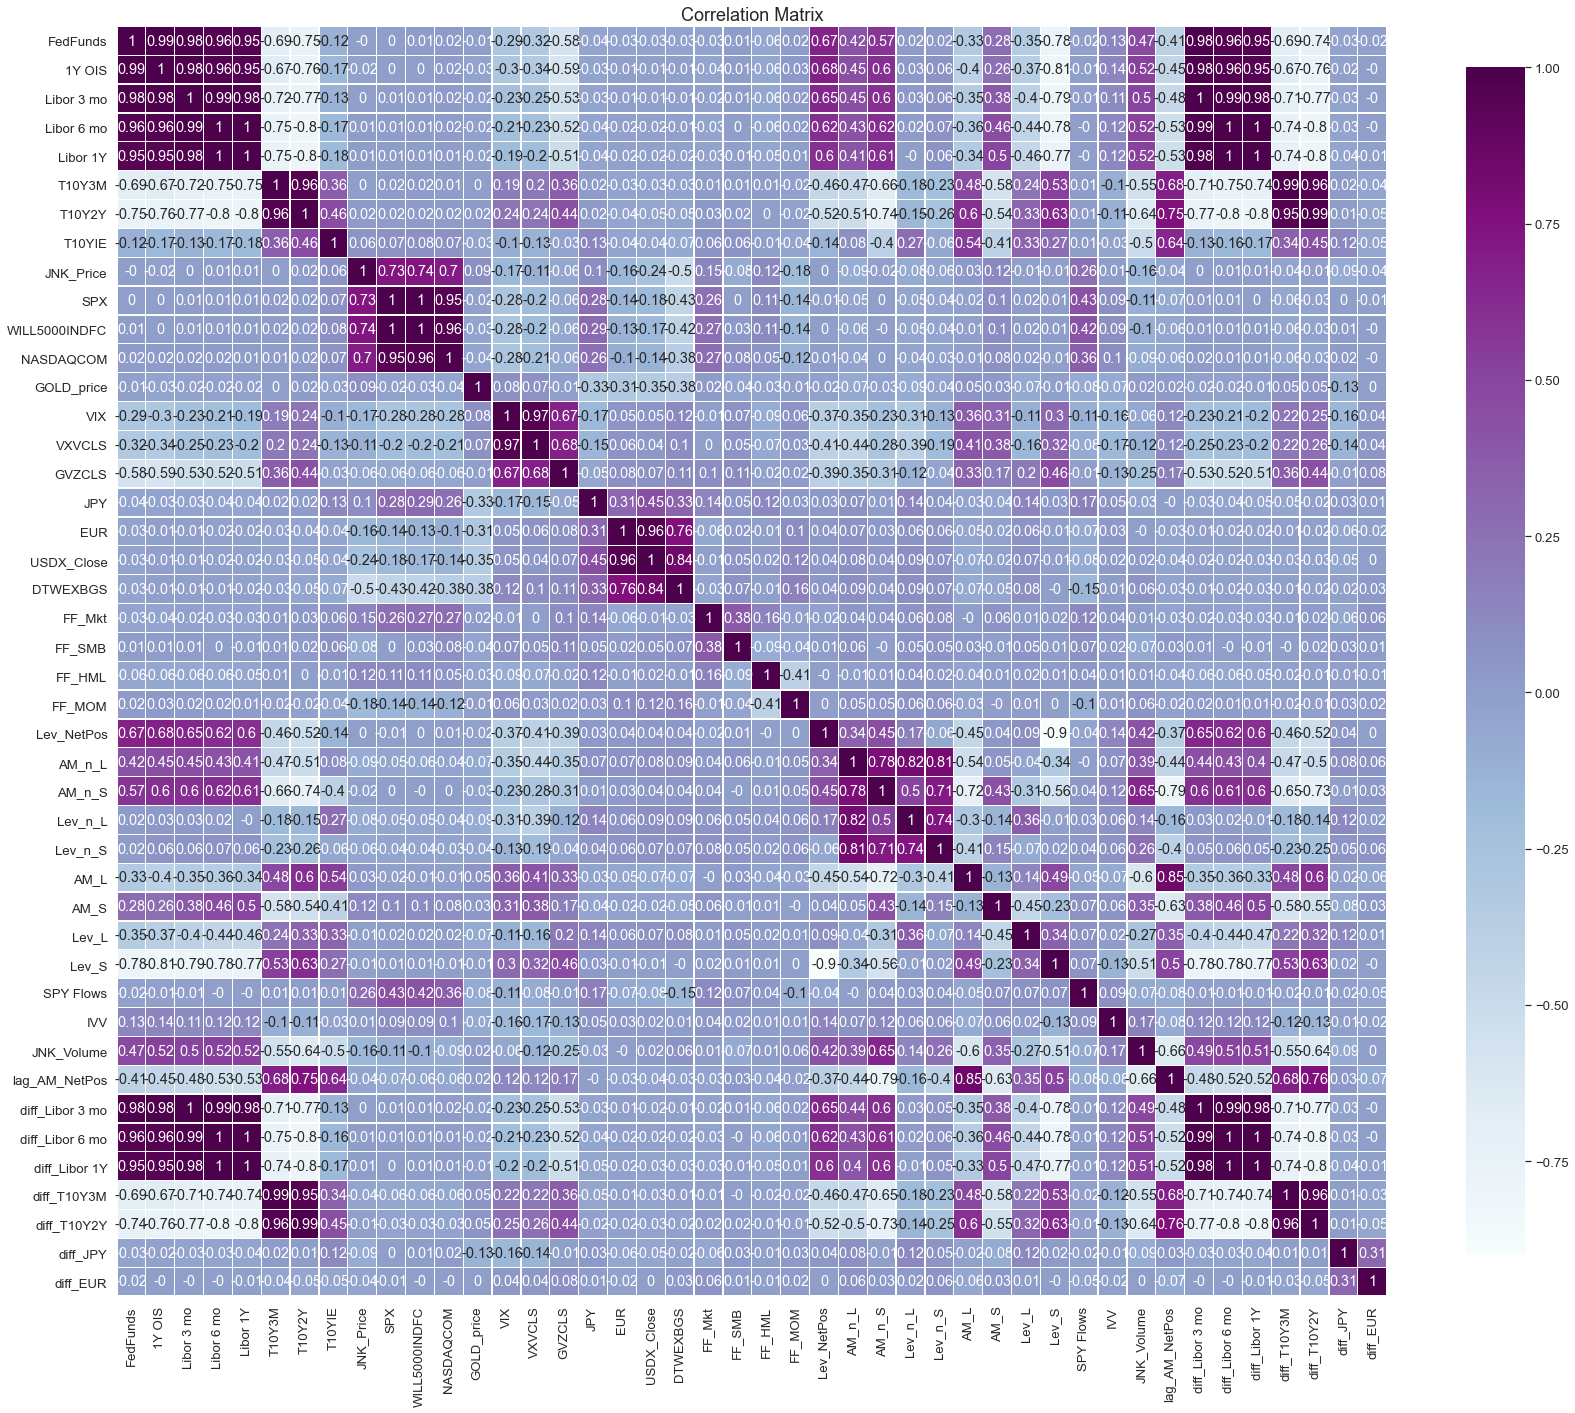

In [131]:
sns.set(font_scale = 1.2)
f, ax = plt.subplots(figsize=(24, 24))
ax = sns.heatmap(np.around(X_train.corr(),2), square=True,linewidths=.3,annot=True,cbar_kws={"shrink": .7}, cmap="BuPu")
plt.tight_layout()
plt.title('Correlation Matrix',size=18)
plt.show()

In [132]:
def tsplot(y, lags=None, figsize = (10,8), style = 'bmh',title='Time Series of Log Ret'):
    import statsmodels.tsa.api as smt
    import statsmodels.api as sm
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan = 2)
        acf_ax = plt.subplot2grid(layout, (1,1))
        qq_ax = plt.subplot2grid(layout, (1,0))
        y.plot(ax = ts_ax)
        ts_ax.set_title(title)
        smt.graphics.plot_acf(y, lags = lags, ax=acf_ax,alpha = 0.05)
        sm.qqplot(y, line = 's', ax=qq_ax)
        qq_ax.set_title('QQ PLot')
        plt.tight_layout()

#### Standardization

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [134]:
res_before2020 = pd.DataFrame(index = ['Ridge', 'Lasso', 'Random Forest'], columns = ['MSE', 'MAE'])
res_2020 = pd.DataFrame(index = ['Ridge', 'Lasso', 'Random Forest'], columns = ['MSE', 'MAE'])

#### Rolling Test Machine

In [ ]:
def rolling_pred(X_train, X_test, model, cv_splitter):
    '''
    return rolling prediction
    '''
    

In [135]:
ind_year2020 = np.where(test_data['Time'] > "2020-01-01")[0][0]

#### Ridge

In [136]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [137]:
tscv = TimeSeriesSplit(n_splits = 5)

In [138]:
ridge = RidgeCV(alphas = np.logspace(0.1,2,50), cv = tscv)
ridge.fit(X_train_std, y_train)

RidgeCV(alphas=array([  1.25892541,   1.37649776,   1.50505032,   1.64560853,
         1.79929362,   1.96733152,   2.15106266,   2.35195264,
         2.57160393,   2.8117687 ,   3.0743627 ,   3.36148062,
         3.67541279,   4.01866341,   4.39397056,   4.80432804,
         5.25300922,   5.74359321,   6.27999335,   6.86648845,
         7.50775694,   8.20891416,   8.97555318,   9.81378942,
        10.73030941,  11.73242415,  12.82812743,  14.02615957,
        15.33607719,  16.76832937,  18.33434107,  20.04660423,
        21.91877742,  23.96579481,  26.20398529,  28.6512027 ,
        31.32696828,  34.25262639,  37.45151475,  40.94915062,
        44.77343434,  48.95487189,  53.52681823,  58.52574339,
        63.99152336,  69.96775821,  76.50211983,  83.64673228,
        91.4585875 , 100.        ]),
        cv=TimeSeriesSplit(max_train_size=None, n_splits=5))

In [139]:
ridge.alpha_

76.502119832752

In [140]:
res_before2020.loc['Ridge', 'MSE'] = mean_squared_error(y_test[:ind_year2020], ridge.predict(X_test_std[:ind_year2020,:]))
res_before2020.loc['Ridge', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], ridge.predict(X_test_std[:ind_year2020,:]))

In [141]:
res_2020.loc['Ridge', 'MSE'] = mean_squared_error(y_test[ind_year2020:], ridge.predict(X_test_std[ind_year2020:,:]))
res_2020.loc['Ridge', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], ridge.predict(X_test_std[ind_year2020:,:]))

#### Lasso

In [142]:
lasso = LassoCV(max_iter = 100000, cv = tscv)
lasso.fit(X_train_std, y_train)

LassoCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5), max_iter=100000)

In [143]:
np.log(lasso.alpha_)

6.159307112657825

In [144]:
alpha_range = lasso.alphas_
mse_values = lasso.mse_path_.mean(axis = 1)
sd_values = lasso.mse_path_.std(axis = 1)

In [145]:
alpha_min_ind = np.where(np.abs(np.log(alpha_range) - np.log(lasso.alpha_)) < 1e-4)[0]
alpha_1se_ind = len(mse_values) - np.searchsorted(mse_values[::-1], mse_values[alpha_min_ind]+sd_values[alpha_min_ind])
alpha_1se = alpha_range[alpha_1se_ind]

In [146]:
# 1se
from sklearn.linear_model import Lasso
lasso_1se = Lasso(alpha = alpha_1se, max_iter = 10000)
lasso_1se.fit(X_train_std, y_train)

Lasso(alpha=array([3837.46122691]), max_iter=10000)

Test lasso

In [147]:
res_before2020.loc['Lasso', 'MSE'] = mean_squared_error(y_test[:ind_year2020], lasso.predict(X_test_std[:ind_year2020,:]))
res_before2020.loc['Lasso', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], lasso.predict(X_test_std[:ind_year2020,:]))

In [148]:
res_2020.loc['Lasso', 'MSE'] = mean_squared_error(y_test[ind_year2020:], lasso.predict(X_test_std[ind_year2020:,:]))
res_2020.loc['Lasso', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], lasso.predict(X_test_std[ind_year2020:,:]))

Test lasso1se

In [149]:
res_before2020.loc['Lasso1se', 'MSE'] = mean_squared_error(y_test[:ind_year2020], lasso_1se.predict(X_test_std[:ind_year2020,:]))
res_before2020.loc['Lasso1se', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], lasso_1se.predict(X_test_std[:ind_year2020,:]))

In [150]:
res_2020.loc['Lasso1se', 'MSE'] = mean_squared_error(y_test[ind_year2020:], lasso_1se.predict(X_test_std[ind_year2020:,:]))
res_2020.loc['Lasso1se', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], lasso_1se.predict(X_test_std[ind_year2020:,:]))

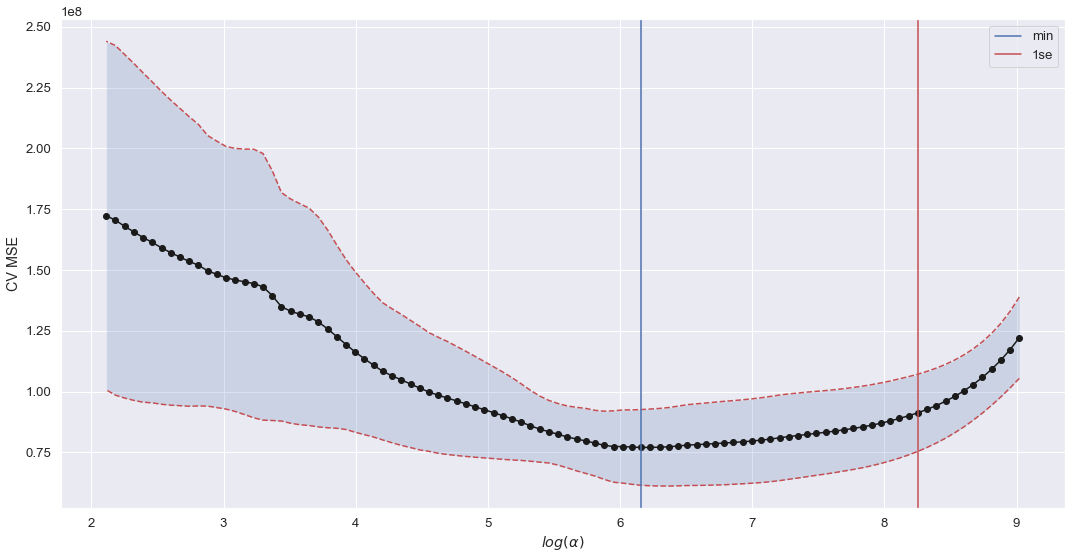

In [151]:
plt.figure(figsize = [18,9])
plt.plot(np.log(alpha_range), mse_values ,"ko-")
plt.plot(np.log(alpha_range), mse_values + sd_values,"r--")
plt.plot(np.log(alpha_range), mse_values - sd_values,"r--")
plt.fill_between(np.log(alpha_range),
                mse_values + sd_values,
                mse_values - sd_values, alpha = .2)

plt.axvline(np.log(lasso.alpha_), label = 'min')
plt.axvline(np.log(alpha_1se), label = '1se', color = 'r')
plt.legend()
plt.xlabel(r"$log(\alpha)$")
plt.ylabel("CV MSE");

__Useful variables selected by LASSO__

In [152]:
X_train.columns[np.abs(lasso.coef_ - 0) > 1e-4]

Index(['SPX', 'GOLD_price', 'VIX', 'EUR', 'FF_Mkt', 'FF_SMB', 'AM_S', 'Lev_L',
       'SPY Flows', 'JNK_Volume', 'lag_AM_NetPos', 'diff_EUR'],
      dtype='object')

In [153]:
X_train.columns[np.abs(lasso_1se.coef_ - 0) > 1e-4]

Index(['SPX'], dtype='object')

#### RandomForest

In [154]:
X_train_std.shape

(422, 44)

In [155]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 20, max_features = 'sqrt')
rf.fit(X_train_std, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=20)

In [156]:
res_before2020.loc['Random Forest', 'MSE'] = mean_squared_error(y_test[:ind_year2020], rf.predict(X_test_std[:ind_year2020,:]))
res_before2020.loc['Random Forest', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], rf.predict(X_test_std[:ind_year2020,:]))

In [157]:
res_2020.loc['Random Forest', 'MSE'] = mean_squared_error(y_test[ind_year2020:], rf.predict(X_test_std[ind_year2020:,:]))
res_2020.loc['Random Forest', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], rf.predict(X_test_std[ind_year2020:,:]))

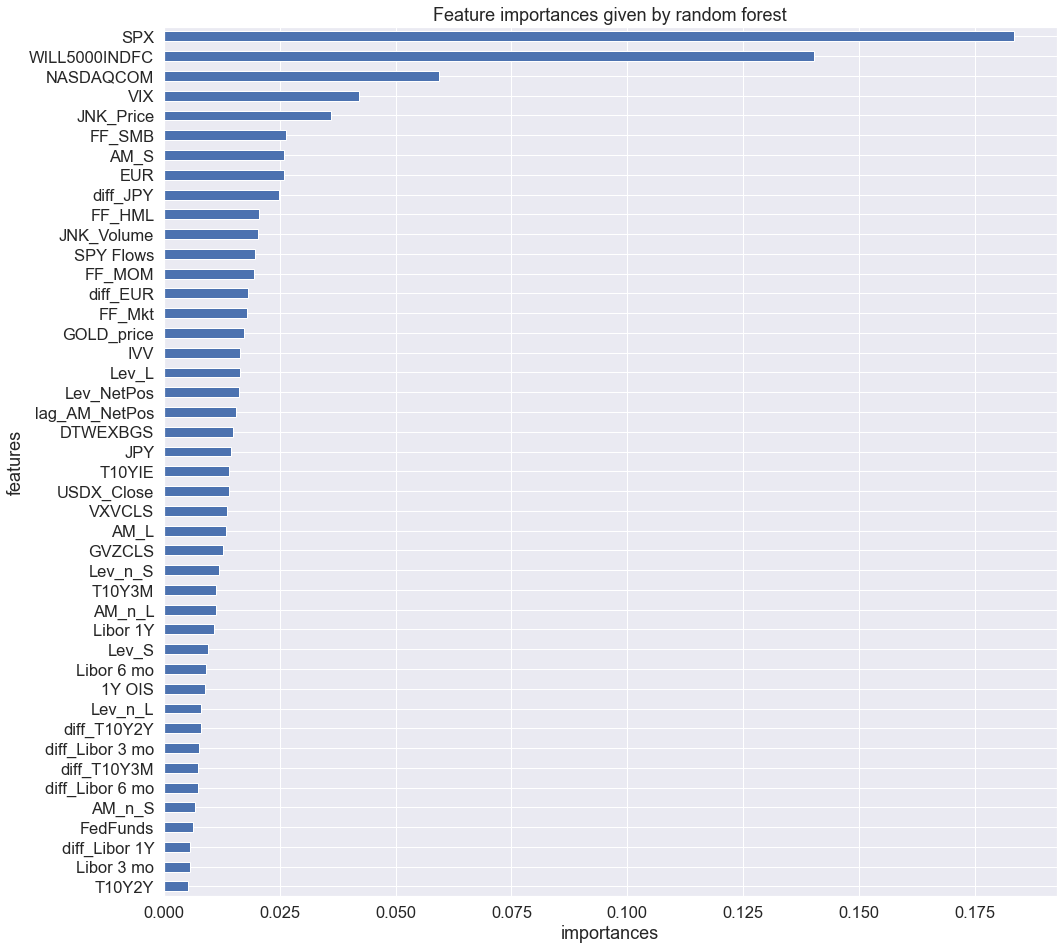

In [158]:
feat_importance = pd.Series(rf.feature_importances_, index = X_train.columns)
sns.set(font_scale = 1.5)
fis = np.argsort(feat_importance)
feat_importance = feat_importance[fis]
fig = plt.figure(figsize = [16,16])
ax = fig.subplots(1,1)
feat_importance.plot(kind = 'barh', ax = ax)
plt.ylabel('features')
plt.xlabel('importances')
plt.title("Feature importances given by random forest")
plt.show()

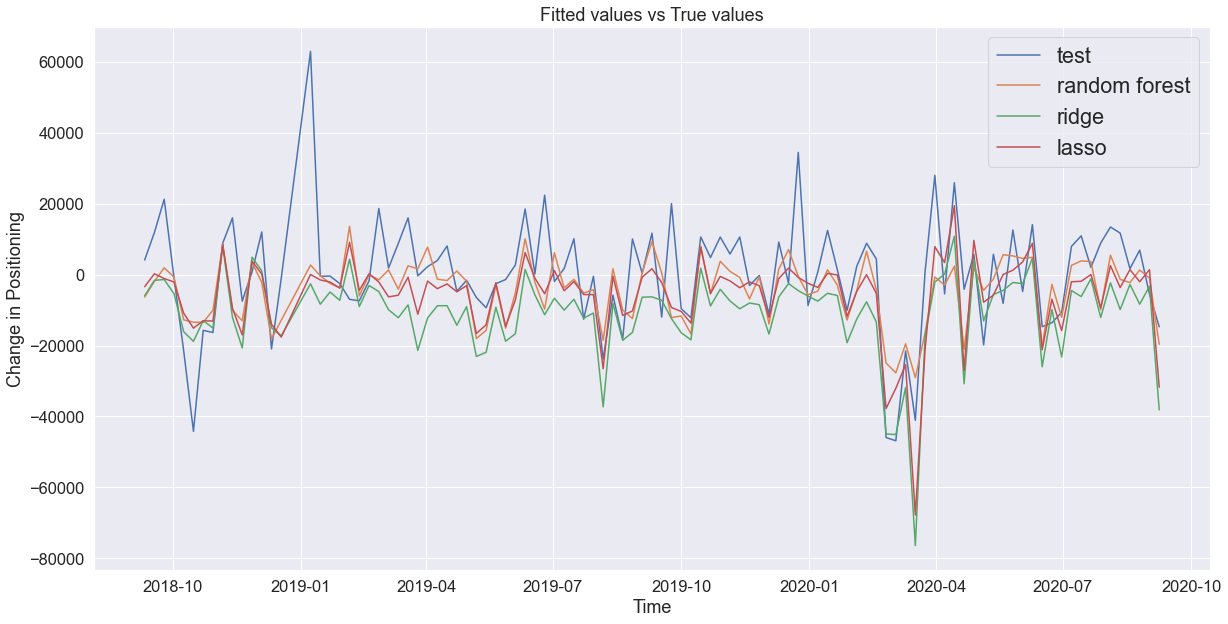

In [159]:
fig = plt.figure(figsize = [20,10])
plt.plot(test_data['Time'], y_test, label = 'test')
plt.plot(test_data['Time'], rf.predict(X_test_std), label = 'random forest')
plt.plot(test_data['Time'], ridge.predict(X_test_std), label = 'ridge')
plt.plot(test_data['Time'], lasso.predict(X_test_std), label = 'lasso')
plt.xlabel("Time")
plt.ylabel("Change in Positioning")
plt.title('Fitted values vs True values')
plt.legend(fontsize = 'large')

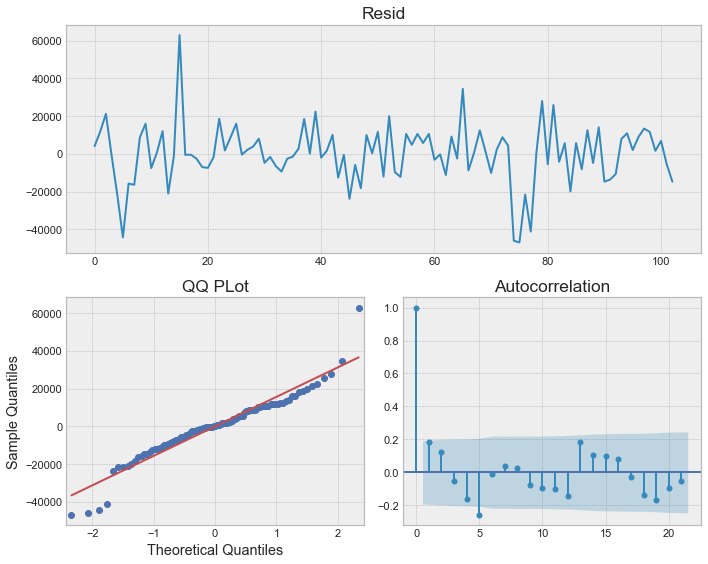

In [220]:
tsplot(y_test, title = 'Resid')

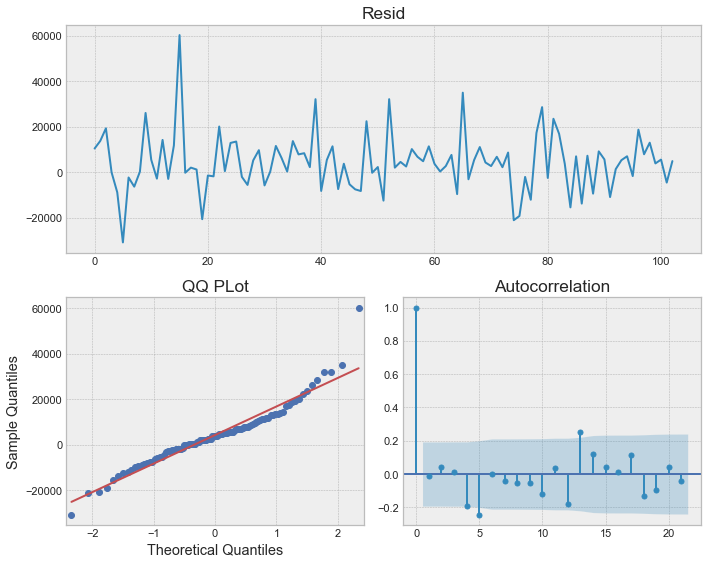

In [217]:
sns.set(font_scale = 1)
sns.set_style("whitegrid")
tsplot(y_test - rf.predict(X_test_std), title = 'Resid')

In [222]:
acorr_ljungbox(y_test, lags = 10, return_df = True)

,lb_stat,lb_pvalue
1,3.663418,0.055619
2,5.253367,0.072318
3,5.543013,0.136088
4,8.401270,0.077937
5,15.812522,0.007400
6,15.832030,0.014684
7,15.988644,0.025220
8,16.049440,0.041678
9,16.745223,0.052858
10,17.785911,0.058684


In [215]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(y_test - rf.predict(X_test_std), lags = 10, return_df = True)

,lb_stat,lb_pvalue
1,0.013228,0.908436
2,0.220531,0.895596
3,0.241979,0.970544
4,4.236755,0.374912
5,10.902407,0.053350
6,10.902735,0.091429
7,11.091134,0.134693
8,11.418751,0.179082
9,11.763839,0.226953
10,13.432687,0.200475


In [216]:
acorr_ljungbox(y_test, lags = 10, return_df = True)

,lb_stat,lb_pvalue
1,3.663418,0.055619
2,5.253367,0.072318
3,5.543013,0.136088
4,8.401270,0.077937
5,15.812522,0.007400
6,15.832030,0.014684
7,15.988644,0.025220
8,16.049440,0.041678
9,16.745223,0.052858
10,17.785911,0.058684


In [161]:
res_before2020

,MSE,MAE
Ridge,2.82983e+08,12870.8
Lasso,2.01269e+08,9751.53
Random Forest,1.97742e+08,9441.88
Lasso1se,1.82682e+08,9277.36


In [162]:
res_2020

,MSE,MAE
Ridge,2.25428e+08,12475.9
Lasso,1.39276e+08,10017.2
Random Forest,1.34869e+08,9471.77
Lasso1se,1.32547e+08,9038.53


#### Random Forest With Tuning

In [180]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
p = X_train_std.shape[1]
param_grids_random = {
    'max_depth': [2, 3, 5, 6, 8, 10],
    'n_estimators': [2, 5, 10, 15, 20, 25, 30]
}

In [181]:
random_grid_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grids_random, scoring='neg_mean_absolute_error', cv=tscv, n_iter = 40).fit(X_train_std, y_train)

In [182]:
random_grid_search.best_params_

{'n_estimators': 30, 'max_depth': 6}

By random grid search, the best parameter for random forest is {'n_estimators': 30, 'max_depth': 6}

In [183]:
res_before2020.loc['Random Forest Tuning', 'MSE'] = mean_squared_error(y_test[:ind_year2020], random_grid_search.predict(X_test_std[:ind_year2020,:]))
res_before2020.loc['Random Forest Tuning', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], random_grid_search.predict(X_test_std[:ind_year2020,:]))

In [184]:
res_2020.loc['Random Forest Tuning', 'MSE'] = mean_squared_error(y_test[ind_year2020:], random_grid_search.predict(X_test_std)[ind_year2020:])
res_2020.loc['Random Forest Tuning', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], random_grid_search.predict(X_test_std)[ind_year2020:])

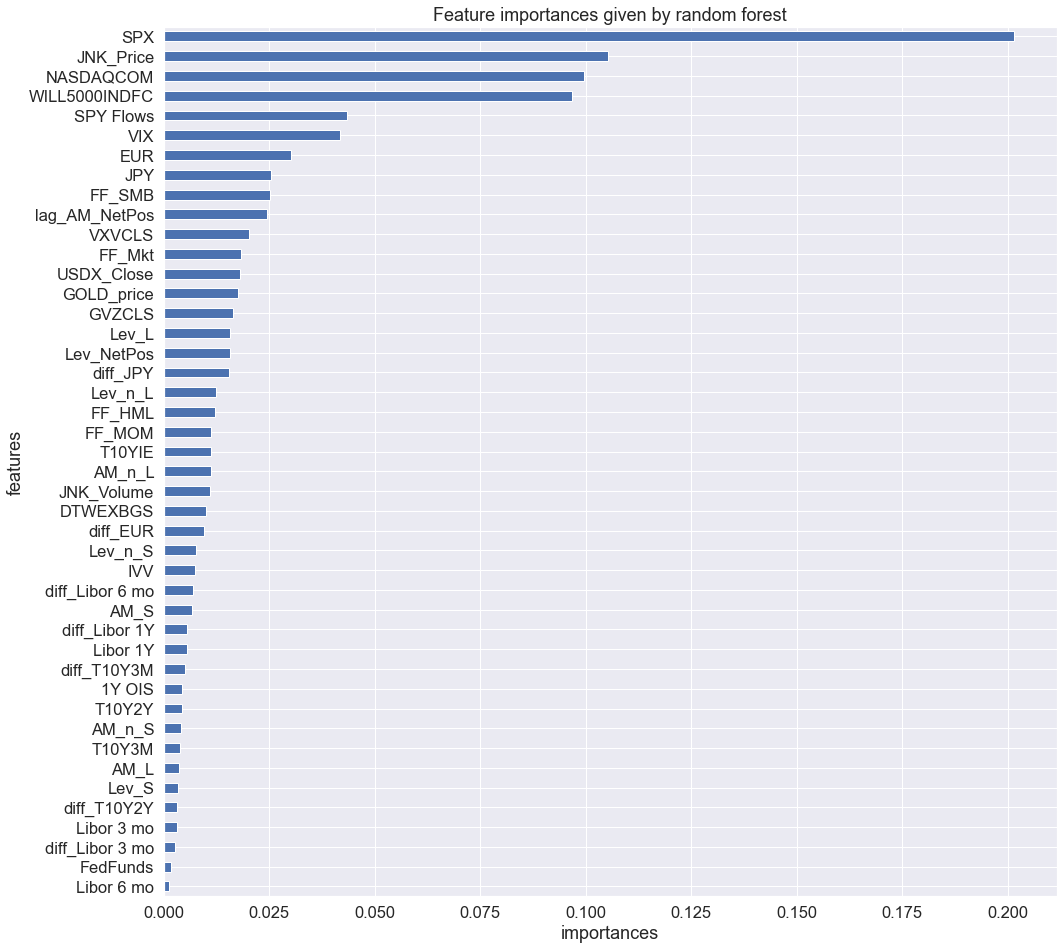

In [185]:
sns.set(font_scale = 1.5)
feat_importance = pd.Series(random_grid_search.best_estimator_.feature_importances_, index = X_train.columns)
fis = np.argsort(feat_importance)
feat_importance = feat_importance[fis]
fig = plt.figure(figsize = [16,16])
ax = fig.subplots(1,1)
feat_importance.plot(kind = 'barh', ax = ax)
plt.ylabel('features')
plt.xlabel('importances')
plt.title("Feature importances given by random forest")
plt.show()

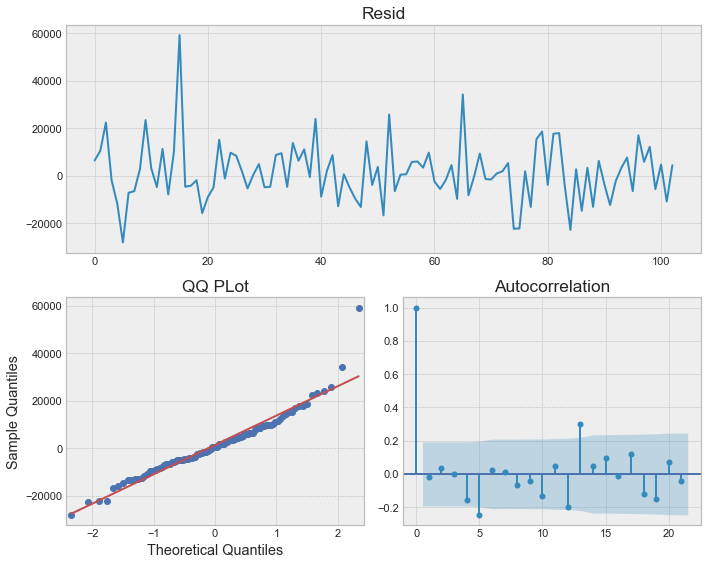

In [218]:
tsplot(y_test - random_grid_search.predict(X_test_std), title = 'Resid')

In [219]:
acorr_ljungbox(y_test - random_grid_search.predict(X_test_std), lags = 10, return_df = True)

,lb_stat,lb_pvalue
1,0.037968,0.845508
2,0.161870,0.922254
3,0.163260,0.983290
4,2.784417,0.594526
5,9.504576,0.090553
6,9.553958,0.144736
7,9.574568,0.213991
8,10.038677,0.262322
9,10.278079,0.328446
10,12.397411,0.259339


Text(0, 0.5, 'Fitted Data')

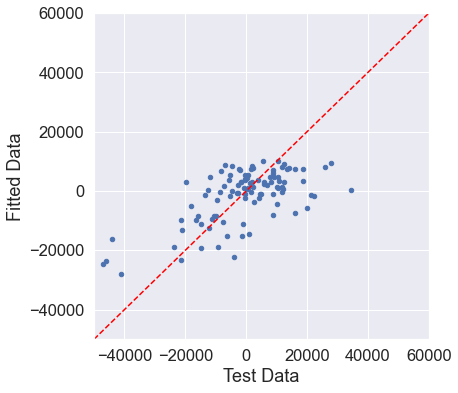

In [186]:
fig = plt.figure(figsize = [6,6])
ax = fig.subplots(1,1)
ax.scatter(y_test, random_grid_search.predict(X_test_std), s = 20)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
ax.set(xlim=(-50000, 60000), ylim=(-50000, 60000))
ax.set_xlabel("Test Data")
ax.set_ylabel("Fitted Data")

We can see our model tends to overestimate the change in positioning data.

#### Elastic Net

In [187]:
from sklearn.linear_model import ElasticNetCV
elastic = ElasticNetCV(l1_ratio = np.linspace(0.4, 1, 10), alphas = np.logspace(1,2,20, base = np.exp(1)), max_iter = 10000, cv= tscv)
elastic.fit(X_train_std, y_train)

ElasticNetCV(alphas=array([2.71828183, 2.86518116, 3.02001911, 3.18322469, 3.35525011,
       3.53657199, 3.72769274, 3.92914189, 4.1414776 , 4.36528819,
       4.60119379, 4.84984802, 5.11193983, 5.38819541, 5.67938019,
       5.98630095, 6.30980809, 6.65079796, 7.01021535, 7.3890561 ]),
             cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             l1_ratio=array([0.4       , 0.46666667, 0.53333333, 0.6       , 0.66666667,
       0.73333333, 0.8       , 0.86666667, 0.93333333, 1.        ]),
             max_iter=10000)

In [188]:
np.log(elastic.alpha_)

1.789473684210526

In [189]:
elastic.l1_ratio_

0.9333333333333333

In [190]:
res_before2020.loc['Elastic Net', 'MSE'] = mean_squared_error(y_test[:ind_year2020], elastic.predict(X_test_std)[:ind_year2020])
res_before2020.loc['Elastic Net', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], elastic.predict(X_test_std)[:ind_year2020])

In [191]:
res_2020.loc['Elastic Net', 'MSE'] = mean_squared_error(y_test[ind_year2020:], elastic.predict(X_test_std)[ind_year2020:])
res_2020.loc['Elastic Net', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], elastic.predict(X_test_std)[ind_year2020:])

In [192]:
X_train.columns[np.abs(elastic.coef_ - 0) > 1e-4]

Index(['FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo', 'T10Y3M', 'T10Y2Y',
       'T10YIE', 'JNK_Price', 'SPX', 'WILL5000INDFC', 'NASDAQCOM',
       'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS', 'JPY', 'EUR', 'USDX_Close',
       'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML', 'FF_MOM', 'Lev_NetPos',
       'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L',
       'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume', 'lag_AM_NetPos',
       'diff_Libor 3 mo', 'diff_Libor 6 mo', 'diff_Libor 1Y', 'diff_T10Y3M',
       'diff_T10Y2Y', 'diff_JPY', 'diff_EUR'],
      dtype='object')

In [193]:
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# sns.set(font_scale = 2)
# fig = plt.figure(figsize = [32,32])
# ax = fig.gca(projection='3d')

# # Make data.
# X = np.log(elastic.alphas_)
# Y = np.linspace(0.4, 1, 50)
# X, Y = np.meshgrid(X, Y)
# Z = elastic.mse_path_.mean(axis = 2)

# # Plot the surface.
# surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)

# # Customize the z axis.
# #ax.set_zlim(-1.01, 1.01)
# # ax.zaxis.set_major_locator(LinearLocator(10))
# # ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# ax.set_xlabel("Penalty")
# ax.set_ylabel("L1-ratio")
# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

# plt.show()

#### Examine those important variables

In [194]:
lasso_pick = X_train.columns[np.abs(lasso.coef_ - 0) > 1e-4]
lasso_pick

Index(['SPX', 'GOLD_price', 'VIX', 'EUR', 'FF_Mkt', 'FF_SMB', 'AM_S', 'Lev_L',
       'SPY Flows', 'JNK_Volume', 'lag_AM_NetPos', 'diff_EUR'],
      dtype='object')

In [195]:
rf_pick = feat_importance[-10:].index
rf_pick

Index(['lag_AM_NetPos', 'FF_SMB', 'JPY', 'EUR', 'VIX', 'SPY Flows',
       'WILL5000INDFC', 'NASDAQCOM', 'JNK_Price', 'SPX'],
      dtype='object')

In [196]:
common_pick = set(rf_pick).intersection(set(lasso_pick))
common_pick

{'EUR', 'FF_SMB', 'SPX', 'SPY Flows', 'VIX', 'lag_AM_NetPos'}

In [197]:
X_train.columns

Index(['FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo', 'Libor 1Y', 'T10Y3M',
       'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX', 'WILL5000INDFC', 'NASDAQCOM',
       'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS', 'JPY', 'EUR', 'USDX_Close',
       'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML', 'FF_MOM', 'Lev_NetPos',
       'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L',
       'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume', 'lag_AM_NetPos',
       'diff_Libor 3 mo', 'diff_Libor 6 mo', 'diff_Libor 1Y', 'diff_T10Y3M',
       'diff_T10Y2Y', 'diff_JPY', 'diff_EUR'],
      dtype='object')

In [198]:
pickout = np.arange(len(X_train.columns))[np.isin(X_train.columns, np.array([i for i in common_pick]))]
pickout

array([ 9, 13, 17, 21, 33, 36])

In [199]:
X_train.columns[pickout]

Index(['SPX', 'VIX', 'EUR', 'FF_SMB', 'SPY Flows', 'lag_AM_NetPos'], dtype='object')

In [200]:
res_before2020

,MSE,MAE
Ridge,2.82983e+08,12870.8
Lasso,2.01269e+08,9751.53
Random Forest,1.97742e+08,9441.88
Lasso1se,1.82682e+08,9277.36
Random Forest Tuning,1.71668e+08,9214.25
Elastic Net,2.3293e+08,11186.3


In [201]:
X_train_sel = X_train.iloc[:,pickout]
X_test_sel = X_test.iloc[:,pickout]

__REQUIRES MANUAL CHANGE__

In [202]:
X_train_sel.columns = ['SPX', 'VIX', 'EUR', 'FF_SMB', 'SPYFlows','lag_AM_NetPos']
X_test_sel.columns = ['SPX', 'VIX', 'EUR', 'FF_SMB', 'SPYFlows','lag_AM_NetPos']

In [203]:
r_data_train = pd.concat([X_train_sel, y_train], axis = 1)
r_data_test = pd.concat([X_test_sel, y_test], axis = 1)

In [204]:
import rpy2
%reload_ext rpy2.ipython

In [205]:
%%R -i r_data_train -i r_data_test
head(r_data_train)

           SPX   VIX          EUR  FF_SMB   SPYFlows lag_AM_NetPos dNetPos
0 -0.049365020 34.13  0.006809977 -0.0065  -4424.687        276099  -17663
1 -0.012657985 29.65 -0.034690322 -0.0198 -10835.682        258436   -1699
2  0.065443651 24.56 -0.007701981  0.0160   4171.167        256737   23534
3 -0.010827688 23.93 -0.012111800  0.0065  -1055.807        280271   -4359
4  0.028020822 23.19 -0.008925825 -0.0033   2873.133        275912    -346
5  0.005943403 22.63 -0.017761317 -0.0039   -606.412        275566   -4358


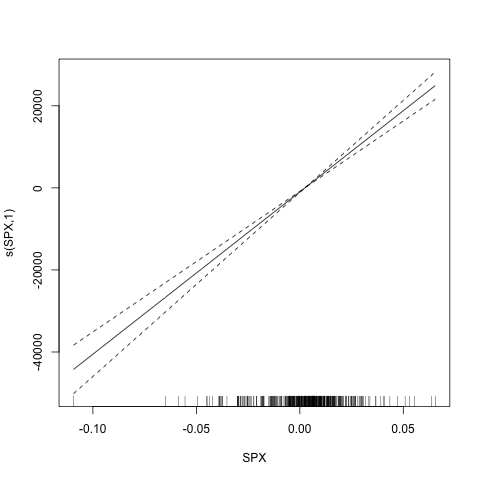

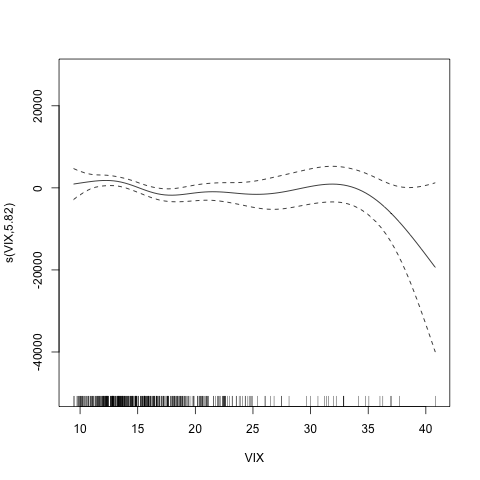

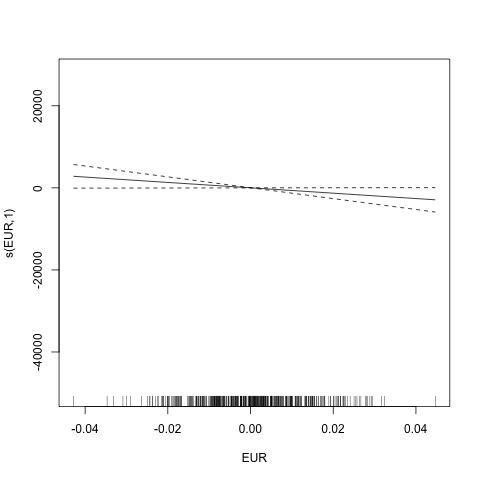

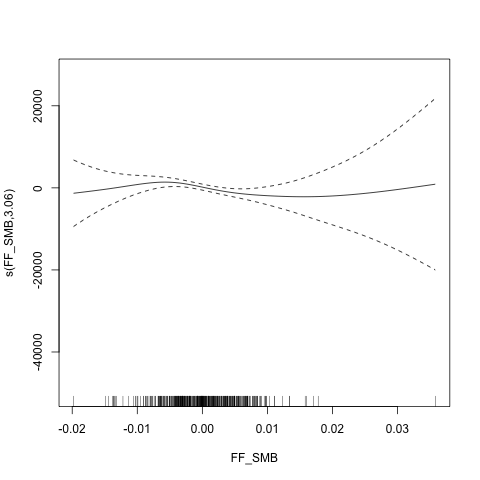

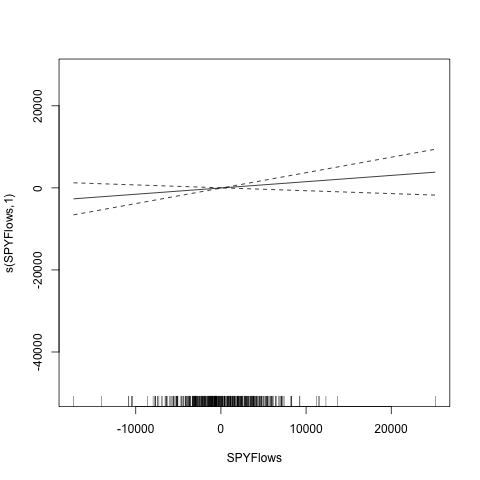

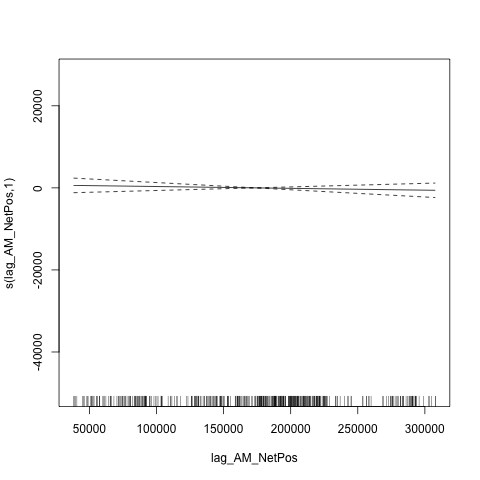

In [206]:
%%R
library(mgcv)
fit = gam(dNetPos ~ s(SPX) + s(VIX) + s(EUR) + s(FF_SMB) + s(SPYFlows) + s(lag_AM_NetPos), data=r_data_train)
plot(fit)

In [207]:
%%R 
summary(fit)


Family: gaussian 
Link function: identity 

Formula:
dNetPos ~ s(SPX) + s(VIX) + s(EUR) + s(FF_SMB) + s(SPYFlows) + 
    s(lag_AM_NetPos)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   -444.5      419.5   -1.06     0.29

Approximate significance of smooth terms:
                   edf Ref.df       F p-value    
s(SPX)           1.000  1.000 223.675  <2e-16 ***
s(VIX)           5.817  6.886   1.936  0.0605 .  
s(EUR)           1.000  1.000   3.821  0.0513 .  
s(FF_SMB)        3.064  3.921   1.810  0.1022    
s(SPYFlows)      1.000  1.000   1.873  0.1719    
s(lag_AM_NetPos) 1.000  1.000   0.456  0.4999    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.496   Deviance explained = 51.1%
GCV = 7.6805e+07  Scale est. = 7.4279e+07  n = 422


In [208]:
%%R -o gam_predict
gam_predict = predict(fit, newdata=r_data_test)

In [209]:
res_before2020.loc['GAM', 'MSE'] = mean_squared_error(y_test[:ind_year2020], gam_predict[:ind_year2020])
res_before2020.loc['GAM', 'MAE'] = mean_absolute_error(y_test[:ind_year2020], gam_predict[:ind_year2020])

In [210]:
res_before2020

,MSE,MAE
Ridge,2.82983e+08,12870.8
Lasso,2.01269e+08,9751.53
Random Forest,1.97742e+08,9441.88
Lasso1se,1.82682e+08,9277.36
Random Forest Tuning,1.71668e+08,9214.25
Elastic Net,2.3293e+08,11186.3
GAM,1.70602e+08,8891.22


In [211]:
res_2020.loc['GAM', 'MSE'] = mean_squared_error(y_test[ind_year2020:], gam_predict[ind_year2020:])
res_2020.loc['GAM', 'MAE'] = mean_absolute_error(y_test[ind_year2020:], gam_predict[ind_year2020:])

In [212]:
res_2020

,MSE,MAE
Ridge,2.25428e+08,12475.9
Lasso,1.39276e+08,10017.2
Random Forest,1.34869e+08,9471.77
Lasso1se,1.32547e+08,9038.53
Random Forest Tuning,1.24121e+08,8832.32
Elastic Net,1.64053e+08,10980.1
GAM,1.45041e+09,19321.2
